In [1]:
!pip install datasets==2.1.0 seaborn==0.11.2 scikit-learn==1.0.2 gensim==4.2.0 nltk==3.7 pymystem3==0.2.0 pyLDAvis==3.3.1

In [2]:
!python -m nltk.downloader stopwords

C:\Users\manen\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from datasets import load_dataset
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from string import punctuation

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
dataset = load_dataset('surdan/nerel_short')

Using custom data configuration surdan--for_test_v3-ebe3ed24b6dbf0bb
Reusing dataset parquet (C:\Users\manen\.cache\huggingface\datasets\parquet\surdan--for_test_v3-ebe3ed24b6dbf0bb\0.0.0\0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    test: Dataset({
        features: ['sequences', 'ids'],
        num_rows: 512
    })
    train: Dataset({
        features: ['sequences', 'ids'],
        num_rows: 2508
    })
    dev: Dataset({
        features: ['sequences', 'ids'],
        num_rows: 536
    })
})

In [6]:
i = np.random.randint(0, len(dataset['train']))
print(dataset['train'][i]['sequences'])
print(dataset['train'][i]['ids'])

['Ранее', 'было', 'приостановленно', 'вещание', 'телевизионной', 'служба', 'информационного', 'агентства', 'на', 'арабском', 'языке', 'из', 'Каира']
[0, 0, 17, 18, 38, 39, 39, 39, 0, 25, 0, 0, 5]


In [7]:
X_train = dataset['train']['sequences']
y_train = dataset['train']['ids']

X_test = dataset['test']['sequences']
y_test = dataset['test']['ids']

X_val = dataset['dev']['sequences']
y_val = dataset['dev']['ids']

In [8]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

## **Стемминг**

In [9]:
stemmer = SnowballStemmer('russian')

In [10]:
doc = X_train[0]
doc

['Виталий',
 'Кличко',
 'хочет',
 'стать',
 'мэром',
 'Киева',
 'Бывший',
 'чемпион',
 'мира',
 'по',
 'боксу',
 'в',
 'тяжёлом',
 'весе',
 'Виталий',
 'Кличко',
 'в',
 'марте',
 'будет',
 'баллотироваться',
 'на',
 'пост',
 'мэра',
 'столицы',
 'Украины',
 'Киева']

In [11]:
" ".join([stemmer.stem(token) for token in doc])

'витал кличк хочет стат мэр киев бывш чемпион мир по бокс в тяжел вес витал кличк в март будет баллотирова на пост мэр столиц украин киев'

In [12]:
%%time
X_train_stem = [[stemmer.stem(token) for token in doc] for doc in X_train]

Wall time: 2.9 s


In [13]:
X_train_stem[0]

['витал',
 'кличк',
 'хочет',
 'стат',
 'мэр',
 'киев',
 'бывш',
 'чемпион',
 'мир',
 'по',
 'бокс',
 'в',
 'тяжел',
 'вес',
 'витал',
 'кличк',
 'в',
 'март',
 'будет',
 'баллотирова',
 'на',
 'пост',
 'мэр',
 'столиц',
 'украин',
 'киев']

In [14]:
print('Количество документов:', len(X_train_stem))
print('Количество слов:', len([token for doc in X_train_stem for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_stem for token in doc])))

Количество документов: 2508
Количество слов: 81072
Количество уникальных слов: 10797


In [15]:
%%time
X_train_stem_stop = [[stemmer.stem(token) for token in doc if token not in russian_stopwords] for doc in X_train]

Wall time: 2.41 s


In [16]:
X_train_stem_stop[0]

['витал',
 'кличк',
 'хочет',
 'стат',
 'мэр',
 'киев',
 'бывш',
 'чемпион',
 'мир',
 'бокс',
 'тяжел',
 'вес',
 'витал',
 'кличк',
 'март',
 'баллотирова',
 'пост',
 'мэр',
 'столиц',
 'украин',
 'киев']

In [17]:
print('Количество документов:', len(X_train_stem_stop))
print('Количество слов:', len([token for doc in X_train_stem_stop for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_stem_stop for token in doc])))

Количество документов: 2508
Количество слов: 64655
Количество уникальных слов: 10779


# **Лемматизация**

In [18]:
!pip install pymorphy2

In [19]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [20]:
doc

['Виталий',
 'Кличко',
 'хочет',
 'стать',
 'мэром',
 'Киева',
 'Бывший',
 'чемпион',
 'мира',
 'по',
 'боксу',
 'в',
 'тяжёлом',
 'весе',
 'Виталий',
 'Кличко',
 'в',
 'марте',
 'будет',
 'баллотироваться',
 'на',
 'пост',
 'мэра',
 'столицы',
 'Украины',
 'Киева']

In [21]:
[morph.parse(token)[0].normal_form for token in doc]

['виталий',
 'кличко',
 'хотеть',
 'стать',
 'мэр',
 'киев',
 'бывший',
 'чемпион',
 'мир',
 'по',
 'бокс',
 'в',
 'тяжёлый',
 'вес',
 'виталий',
 'кличко',
 'в',
 'март',
 'быть',
 'баллотироваться',
 'на',
 'пост',
 'мэр',
 'столица',
 'украина',
 'киев']

In [22]:
[morph.parse(token)[0].normal_form for token in doc if token not in russian_stopwords]

['виталий',
 'кличко',
 'хотеть',
 'стать',
 'мэр',
 'киев',
 'бывший',
 'чемпион',
 'мир',
 'бокс',
 'тяжёлый',
 'вес',
 'виталий',
 'кличко',
 'март',
 'баллотироваться',
 'пост',
 'мэр',
 'столица',
 'украина',
 'киев']

In [23]:
%%time
X_train_lem = [[morph.parse(token)[0].normal_form for token in doc] for doc in X_train]

Wall time: 15.6 s


In [24]:
X_train_lem[0]

['виталий',
 'кличко',
 'хотеть',
 'стать',
 'мэр',
 'киев',
 'бывший',
 'чемпион',
 'мир',
 'по',
 'бокс',
 'в',
 'тяжёлый',
 'вес',
 'виталий',
 'кличко',
 'в',
 'март',
 'быть',
 'баллотироваться',
 'на',
 'пост',
 'мэр',
 'столица',
 'украина',
 'киев']

In [25]:
print('Количество документов:', len(X_train_lem))
print('Количество слов:', len([token for doc in X_train_lem for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_lem for token in doc])))

Количество документов: 2508
Количество слов: 81072
Количество уникальных слов: 10880


In [26]:
%%time
X_train_lem_stop = [[morph.parse(token)[0].normal_form for token in doc if token not in russian_stopwords] for doc in X_train]

Wall time: 9.42 s


In [27]:
X_train_lem_stop[0]

['виталий',
 'кличко',
 'хотеть',
 'стать',
 'мэр',
 'киев',
 'бывший',
 'чемпион',
 'мир',
 'бокс',
 'тяжёлый',
 'вес',
 'виталий',
 'кличко',
 'март',
 'баллотироваться',
 'пост',
 'мэр',
 'столица',
 'украина',
 'киев']

In [28]:
print('Количество документов:', len(X_train_lem_stop))
print('Количество слов:', len([token for doc in X_train_lem_stop for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_lem_stop for token in doc])))

Количество документов: 2508
Количество слов: 64655
Количество уникальных слов: 10865


In [29]:
# Лемматизация с кэшем

In [30]:
%%time
X_train_lem_cache = []
cache = {}

for doc in X_train:
  for token in doc:
    if token not in cache:
      cache[token] = morph.parse(token)[0].normal_form
  doc = [cache[token] for token in doc]
  X_train_lem_cache.append(doc)

Wall time: 2.8 s


In [31]:
print('Количество документов:', len(X_train_lem_cache))
print('Количество слов:', len([token for doc in X_train_lem_cache for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_lem_cache for token in doc])))

Количество документов: 2508
Количество слов: 81072
Количество уникальных слов: 10880


In [32]:
%%time
X_train_lem_cache_stop = []
cache = {}

for doc in X_train:
  for token in doc:
    if token not in cache:
      cache[token] = morph.parse(token)[0].normal_form
  doc = [cache[token] for token in doc if token not in russian_stopwords]
  X_train_lem_cache_stop.append(doc)

Wall time: 2.89 s


In [33]:
print('Количество документов:', len(X_train_lem_cache_stop))
print('Количество слов:', len([token for doc in X_train_lem_cache_stop for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_lem_cache_stop for token in doc])))

Количество документов: 2508
Количество слов: 64655
Количество уникальных слов: 10865


# **Выкинем стоп-слова и соответствующие метки**

In [34]:
%%time
X_train_both = []
y_train_both = []
for i, d in enumerate(X_train):
  doc =[]
  labels = []
  for j, t in enumerate(d):
    if t not in russian_stopwords:
      doc.append(morph.parse(X_train[i][j])[0].normal_form)
      labels.append(y_train[i][j])
  X_train_both.append(doc)
  y_train_both.append(labels)

Wall time: 9.52 s


In [35]:
len(X_train_both[0])

21

In [36]:
len(y_train_both[0])

21

In [37]:
print('Количество документов:', len(X_train_both))
print('Количество слов:', len([token for doc in X_train_both for token in doc]))
print('Количество уникальных слов:', len(set([token for doc in X_train_both for token in doc])))

Количество документов: 2508
Количество слов: 64655
Количество уникальных слов: 10865


In [38]:
print('Количество меток:', len([token for doc in y_train_both for token in doc]))

Количество меток: 64655


# **Визуализация**

C:\Users\manen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Количество слов в документе'>

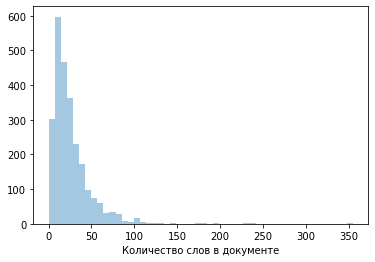

In [39]:
sns.distplot(pd.Series([len(doc) for doc in X_train_both], name='Количество слов в документе'),
             kde=False)

In [40]:
pd.Series([token for doc in y_train_both for token in doc]).nunique()

58

<AxesSubplot:>

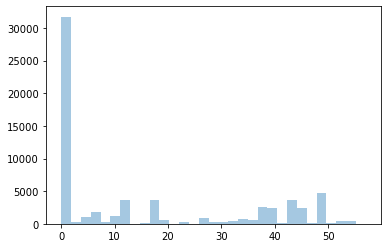

In [41]:
sns.distplot(pd.Series([token for doc in y_train_both for token in doc]), kde=False)

In [42]:
pd.Series([token for doc in y_train_both for token in doc]).value_counts()

0     31563
12     3675
44     3581
48     2733
38     2551
45     2495
39     2330
17     2249
49     1941
7      1777
18     1429
11     1020
5       759
26      746
34      664
36      354
20      339
32      332
55      301
19      268
52      266
31      244
4       243
35      221
27      218
23      211
10      195
3       182
1       159
28      154
47      151
9       142
2       140
29      106
8       106
53      106
30       82
50       79
15       70
54       68
16       63
33       40
46       39
42       36
43       30
6        30
41       26
25       25
40       19
13       19
22       14
21       14
14       13
24       12
57        9
56        9
37        6
51        1
dtype: int64

In [43]:
pd.Series([token for doc in X_train_lem for token in doc]).value_counts().head(50)

в                4195
и                1642
на               1414
год              1290
с                 979
по                881
он                818
быть              778
что               711
о                 533
не                495
который           490
президент         393
из                393
свой              384
это               377
за                319
россия            315
стать             295
к                 265
от                254
как               253
тот               246
после             242
глава             241
пост              217
сша               217
они               212
а                 211
первый            205
этот              204
новый             199
один              194
правительство     191
для               185
также             182
она               177
человек           176
время             171
российский        169
до                163
страна            160
у                 158
партия            157
выборы            155
рф        

In [44]:
pd.Series([token for doc in X_train_lem_stop for token in doc]).value_counts().head(50)

год              1290
в                 577
который           490
президент         393
свой              321
россия            315
стать             295
глава             241
пост              217
сша               217
первый            205
новый             199
по                198
правительство     191
также             182
человек           176
время             171
российский        169
это               161
страна            160
партия            157
выборы            155
рф                145
он                138
область           138
совет             137
один              131
министр           131
день              128
отставка          123
сообщить          121
получить          120
москва            119
закон             117
власть            113
на                113
являться          112
о                 112
назначить         112
бывший            111
однако            110
владимир          109
решение           108
должность         106
полиция           104
компания  

# **TF-IDF**

In [45]:
from os import name
df = dataset['train'].to_pandas().reset_index()
df

,index,sequences,ids
0,0,"[Виталий, Кличко, хочет, стать, мэром, Киева, ...","[44, 45, 0, 0, 48, 5, 0, 3, 4, 0, 0, 0, 0, 0, ..."
1,1,"[Я, хочу, стать, мэром, Киева, так, как, я, оч...","[0, 0, 0, 48, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[Виталий, Кличко, был, чемпионом, мира, по, ве...","[44, 45, 0, 3, 4, 0, 0, 38]"
3,3,"[преследовавших, его, травм, в, ноябре, 2005, ...","[0, 0, 0, 11, 12, 12, 12, 0, 0, 0, 48, 0, 0, 1..."
4,4,"[Подозреваемый, в, гибели, Марины, Голуб, Алек...","[0, 0, 17, 44, 45, 44, 45, 17, 0, 0, 0, 0, 11,..."
...,...,...,...
2503,2503,"[В, возрасте, 57, лет, Хулио, Иглесиас, стал, ...","[0, 0, 2, 1, 44, 45, 0, 0, 0, 0, 0, 44, 0, 0, ..."
2504,2504,"[Хулио, Иглесиас, один, из, самых, успешных, и...","[44, 45, 0, 0, 0, 0, 25, 48]"
2505,2505,"[Солистка, Ленинграда, Василиса, Старшова, объ...","[48, 38, 44, 45, 0, 0, 17, 18, 18, 0, 0, 38, 1..."
2506,2506,"[Спортинг, возглавил, Веркотерен, Стадион, Жоз...","[38, 17, 44, 0, 19, 20, 0, 0, 0, 0, 0, 38, 11,..."


In [46]:
df = pd.DataFrame({'doc': df.index.repeat(df.sequences.str.len()), 
              'token': np.concatenate(df.sequences.values), 
              'label': np.concatenate(df.ids.values) })
df

,doc,token,label
0,0,Виталий,44
1,0,Кличко,45
2,0,хочет,0
3,0,стать,0
4,0,мэром,48
...,...,...,...
81067,2507,к,0
81068,2507,победе,0
81069,2507,в,0
81070,2507,чемпионате,17


In [48]:
X = df.drop(['label', 'doc'], axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = df.label.values

classes = np.unique(y)
classes = classes.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)
X_train.shape, y_train.shape

((54318, 21611), (54318,))

In [58]:
%%time
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

C:\Users\manen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R-квадрат на обучающем наборе: 0.71
R-квадрат на тестовом наборе: 0.68
Wall time: 4min 30s


In [61]:
lr.predict(X_test)[:200]

array([ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0, 44,
        0,  0, 17,  0, 44, 38,  0,  0,  0,  0,  0,  0,  0,  0, 38,  0,  0,
        0,  0,  0,  7,  0,  0,  0, 48,  0,  0, 12,  0,  0,  0,  0, 48,  0,
       31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0, 44,
        0, 12,  0, 38, 38,  0,  7, 34,  0,  0,  0,  0,  0,  0, 48,  0,  0,
        0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 48,  0, 49,
        0,  0,  0,  0,  0,  0,  0, 38,  0,  0,  0,  0,  0, 34, 31,  0,  0,
        0, 44,  0,  0,  0,  0,  0,  0,  0,  0, 44,  0, 38,  0,  0,  0,  0,
        0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 48,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,
        0,  0, 11,  0, 12, 12,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [62]:
y_test[:200]

array([ 0, 45,  0, 35, 11,  0, 12, 44,  0, 45, 39,  0,  0, 45,  0,  0, 44,
        0, 11, 17, 10, 45, 49,  0, 49,  0, 12,  0, 45, 24, 39, 38, 44,  0,
        0,  0, 38,  7,  0,  0,  0, 48,  0,  0, 11,  0,  0,  0,  0, 48,  7,
       31, 10,  0, 44,  0, 42,  0, 45,  7,  0, 44,  0,  5, 48,  0,  0, 17,
        0,  0, 32,  0,  0, 39,  0,  0, 48, 34, 12,  3, 30,  0,  0, 49, 44,
        0, 12,  0, 38, 49, 44, 33,  0, 44,  0,  0,  0,  0,  0, 48,  0,  0,
        0, 38,  0,  0,  0,  0, 45,  0,  0,  0,  0, 26,  0,  0, 48,  0, 49,
        0,  0, 38,  0, 38,  0,  0, 49,  0,  0, 12,  0,  0, 11, 31,  0, 45,
        0, 44,  0, 11, 31,  0,  0,  0,  0,  0, 44,  0, 49, 45,  0,  0, 18,
       44,  0, 49,  0, 38,  0,  0,  0,  0, 34,  0, 12, 11, 38,  0,  0,  0,
        0,  0, 38,  0,  0, 48, 38,  0,  0, 11, 12,  0,  0, 15,  0, 39,  0,
        0,  0,  2, 26, 12, 12,  0,  0,  0,  0,  0, 18,  0], dtype=int64)